# Decomposição

## Concentração de CO2
Concentração de CO2 na atmosfera em ppm de março de 1958 a dezembro de 2001 - Observatório Mauna Loa, Havaí

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 6

In [52]:
import statsmodels.api as sm # vai ser utilizada para importar o dataset

In [53]:
# importando o dataset CO2
## dados são semanais
concentracao = sm.datasets.co2.load_pandas().data
concentracao.head()

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


In [54]:
serie = pd.Series(concentracao['co2'].values, index = concentracao.index) # já utilizando o índice da própria tabela
serie

1958-03-29    316.1
1958-04-05    317.3
1958-04-12    317.6
1958-04-19    317.5
1958-04-26    316.4
              ...  
2001-12-01    370.3
2001-12-08    370.8
2001-12-15    371.2
2001-12-22    371.3
2001-12-29    371.5
Freq: W-SAT, Length: 2284, dtype: float64

<Axes: >

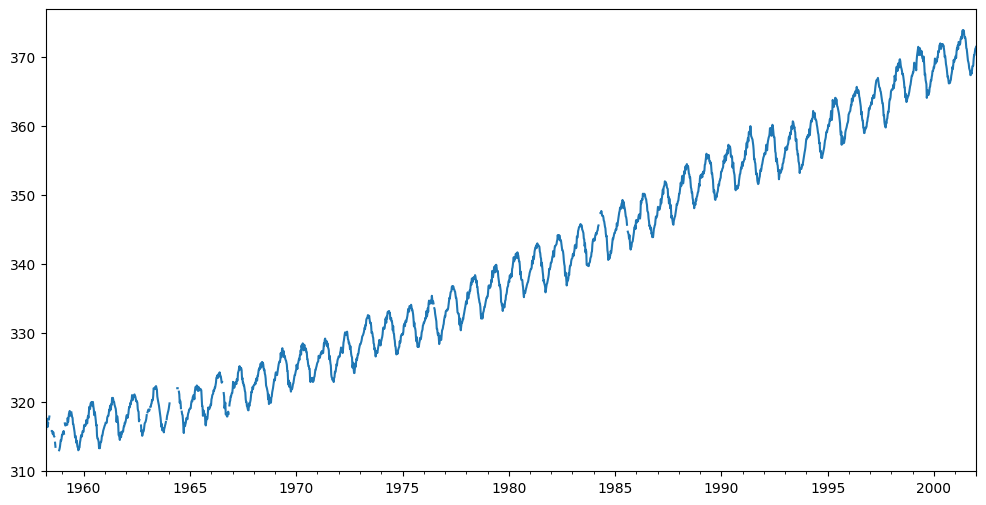

In [55]:
serie.plot() 

Tem algumas falhas aparecendo no gráfico, que provavelmente são valores que não estão no dataset. Eles são chamados missing values.

Vamos tratar esses dados.

In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [57]:
decomposicao = seasonal_decompose(serie) # erro! temos valores faltantes!!

ValueError: This function does not handle missing values

In [ ]:
# analisando valores missing
concentracao.isnull().sum()

co2    59
dtype: int64

In [ ]:
# excluindo valores
## 1 forma - esse é melhor
concentracao.dropna(inplace=True) # dropna = valores inexistentes; inplace=True para esses valores não aparecerem denovo

## 2 forma
#concentracao = concentracao.dropna()

In [ ]:
serie = pd.Series(concentracao['co2'].values, concentracao.index)
# mesmo que serie = pd.Series(concentracao['co2'].values, index = concentracao.index)
serie

1958-03-29    316.1
1958-04-05    317.3
1958-04-12    317.6
1958-04-19    317.5
1958-04-26    316.4
              ...  
2001-12-01    370.3
2001-12-08    370.8
2001-12-15    371.2
2001-12-22    371.3
2001-12-29    371.5
Length: 2225, dtype: float64

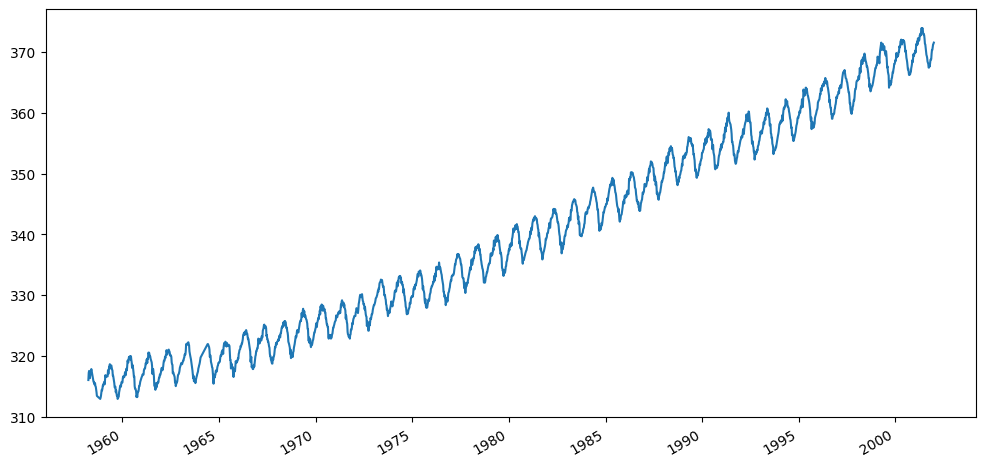

In [ ]:
# plotando série sem falhas
serie.plot(); # ';' serve para suprimir a exibição da saída do comando

In [ ]:
# caso não ter colocado a frequência ao criar o gráfico como era feito dessa forma:
# indice = pd.date_range('ano1', periods = len(dados), freq = 'M')
# temos que adicionar a frequência posteriormente

# decomposição aditiva POR PADRÃO
decomposicao = seasonal_decompose(serie, period=15)

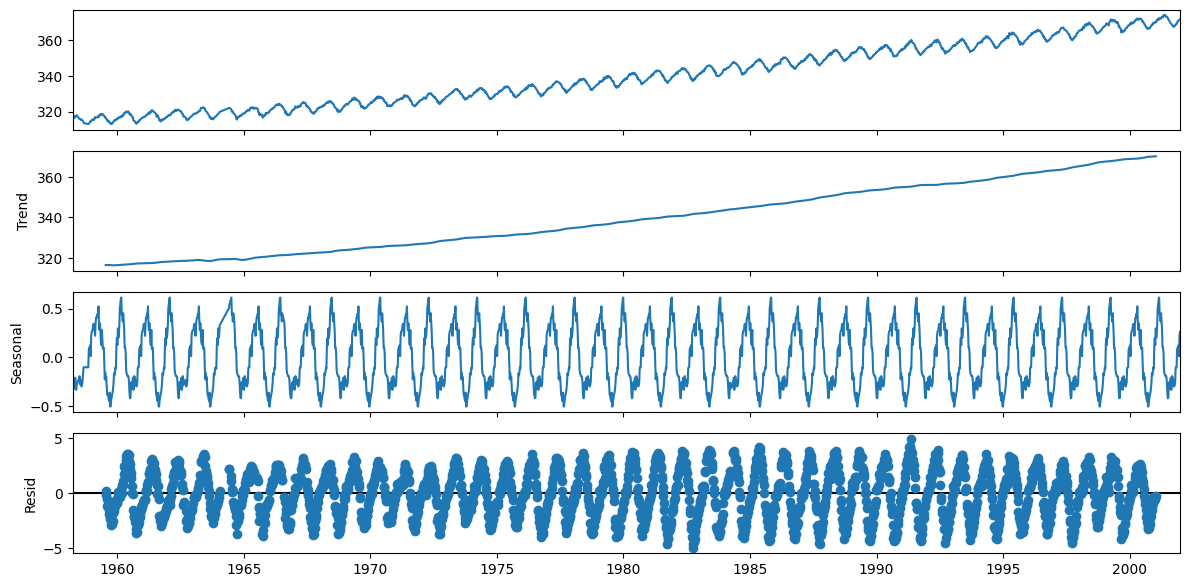

In [ ]:
decomposicao.plot(); # apresentando a tendência, sazonalidade e resíduos separadamente (além da série original)

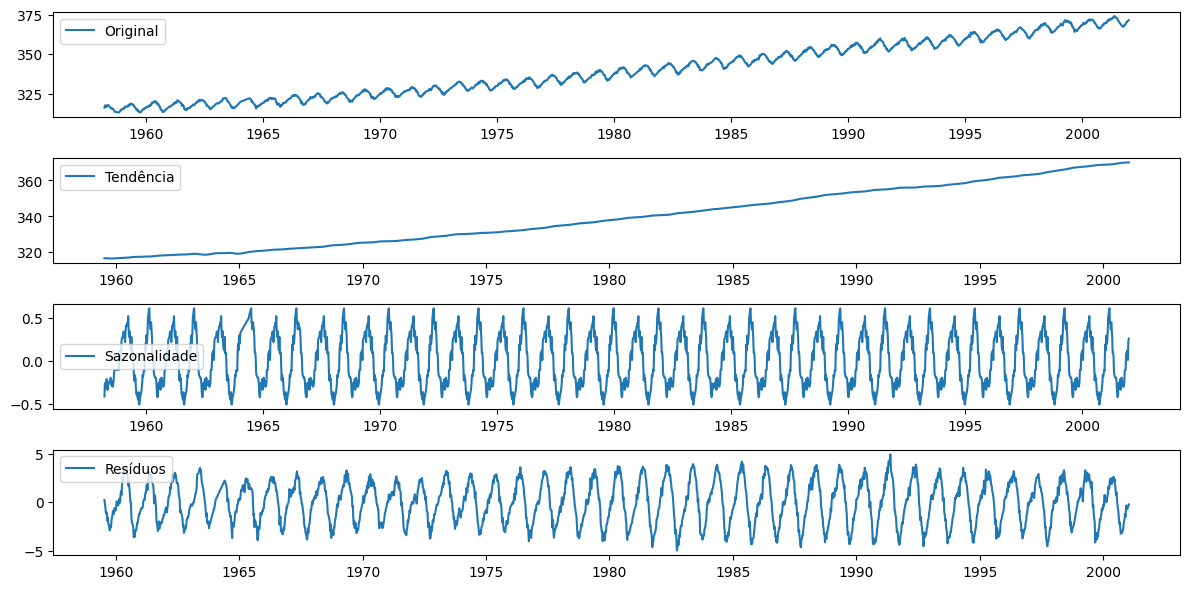

In [ ]:
# plotando o gráfico anterior com legendas
plt.subplot(411)
plt.plot(serie, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(decomposicao.trend, label='Tendência') 
plt.legend(loc='best')

plt.subplot(413)
plt.plot(decomposicao.seasonal,label='Sazonalidade')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(decomposicao.resid, label='Resíduos')
plt.legend(loc='best')

plt.tight_layout() # espaço inicial para visualização
plt.show()

In [ ]:
# decomposição multiplicativa
decomp_mult = seasonal_decompose(serie,period=7,model='multiplicative')

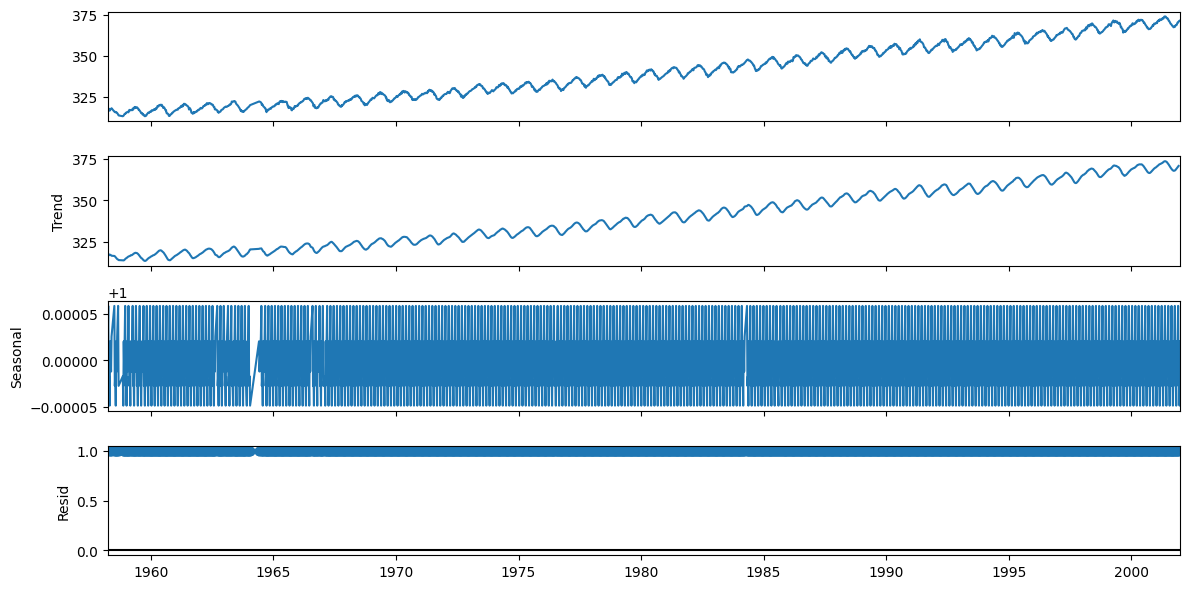

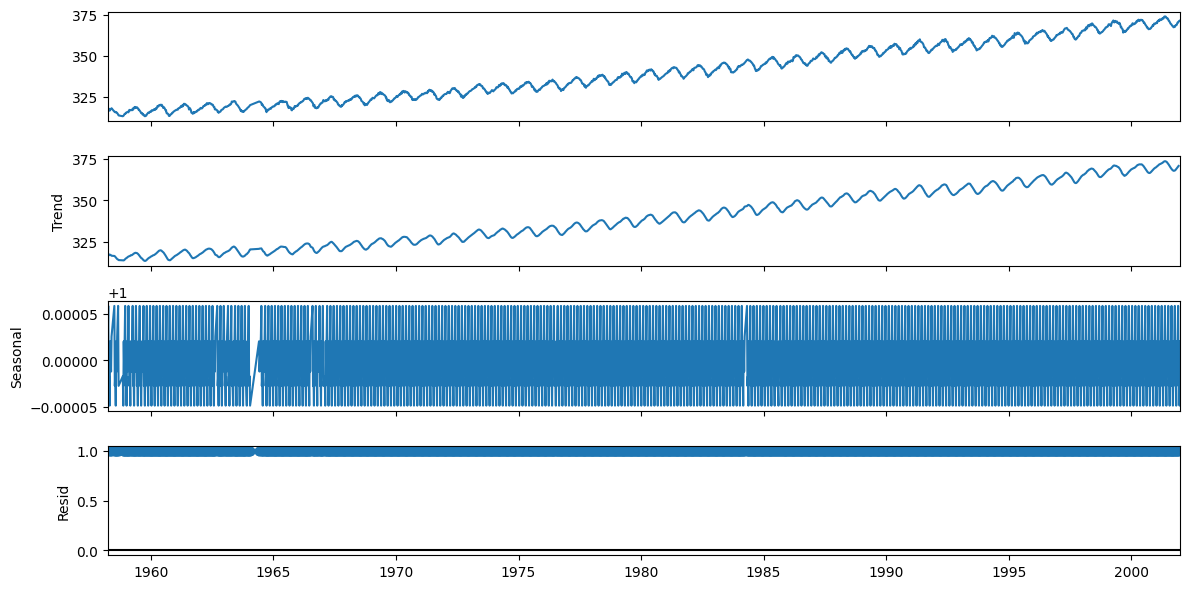

In [ ]:
decomp_mult.plot()

### Aditiva x Multiplicativa

#### Aditiva 
- Mais adequada quando a magnitude dos padrões sazonais é constante ao longo do tempo.
- Útil quando os efeitos sazonais são aditivos, ou seja, a contribuição dos padrões sazonais é consistente.

#### Multiplicativa
- Mais apropriada quando a magnitude dos padrões sazonais varia ao longo do tempo.
- Útil quando os efeitos sazonais são multiplicativos, ou seja, a contribuição dos padrões sazonais é proporcional à magnitude da série temporal.

## **Decomposição Manchas Solares 1**
**Número médio mensal de manchas solares relativas de 1749 a 1983. Coletados no Observatório Federal Suíço, Zurique até 1960, e depois no Observatório Astronômico de Tóquio.**


In [ ]:
manchas_solares = pd.read_csv('sunspots.csv')
manchas_solares.head()

,x
1,58.0
2,62.6
3,70.0
4,55.7
5,85.0


In [ ]:
manchas_solares.columns = ['valores']
manchas_solares.head()

,valores
1,58.0
2,62.6
3,70.0
4,55.7
5,85.0


In [ ]:
# resetando índices
manchas_solares = manchas_solares.reset_index(drop=True) # drop p excluir índice anterior
manchas_solares

,valores
0,58.0
1,62.6
2,70.0
3,55.7
4,85.0
...,...
2815,71.8
2816,50.3
2817,55.8
2818,33.3


In [ ]:
# pegando a frequência mensal
indice = pd.date_range('1749', periods = len(manchas_solares), freq = 'M')
indice

DatetimeIndex(['1749-01-31', '1749-02-28', '1749-03-31', '1749-04-30',
               '1749-05-31', '1749-06-30', '1749-07-31', '1749-08-31',
               '1749-09-30', '1749-10-31',
               ...
               '1983-03-31', '1983-04-30', '1983-05-31', '1983-06-30',
               '1983-07-31', '1983-08-31', '1983-09-30', '1983-10-31',
               '1983-11-30', '1983-12-31'],
              dtype='datetime64[ns]', length=2820, freq='M')

In [58]:
serie2 = pd.Series(manchas_solares['valores'].values, index = indice)

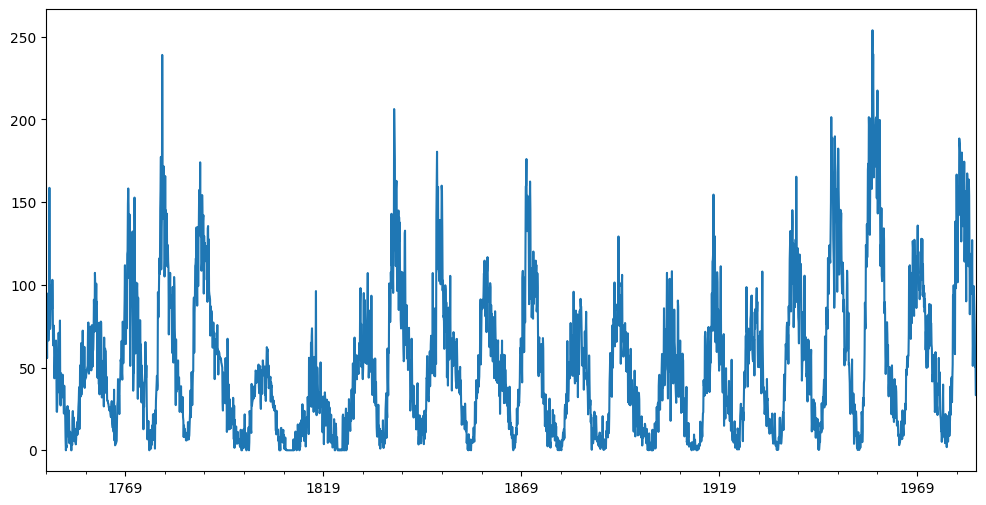

In [59]:
serie2.plot()
plt.show()

In [62]:
decomposicao2 = seasonal_decompose(serie2)

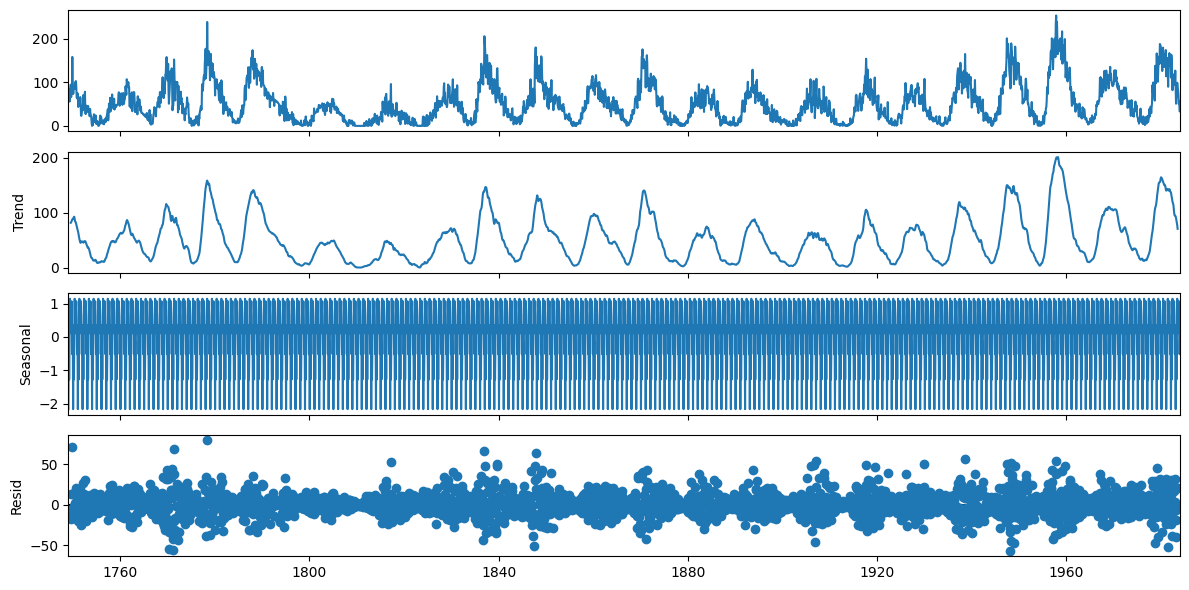

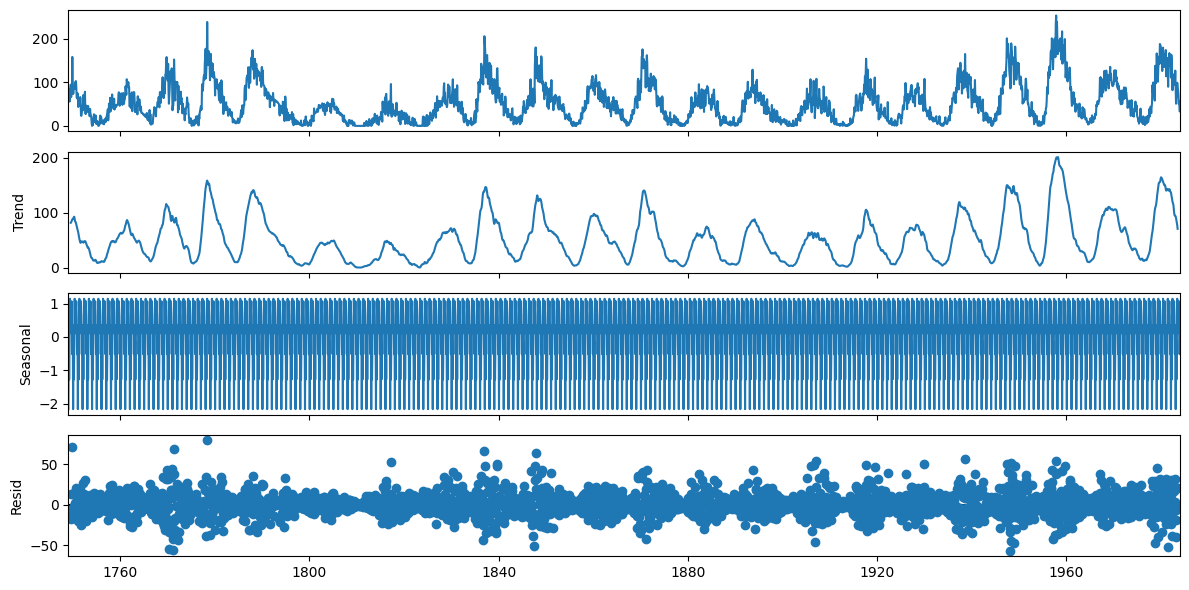

In [63]:
decomposicao2.plot()

In [60]:
decom_mult2 = seasonal_decompose(serie2,model='multiplicative')

ValueError: Multiplicative seasonality is not appropriate for zero and negative values

### **Decomposição Manchas solares 2**
(própria do python)

In [64]:
import statsmodels.api as sm

In [65]:
# importação do Dataset Manchas Solares do Python
manchas_solares = sm.datasets.sunspots.load_pandas().data
manchas_solares

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0
...,...,...
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5


In [66]:
indice = pd.date_range('1700', periods = len(manchas_solares), freq = 'Y')
indice

DatetimeIndex(['1700-12-31', '1701-12-31', '1702-12-31', '1703-12-31',
               '1704-12-31', '1705-12-31', '1706-12-31', '1707-12-31',
               '1708-12-31', '1709-12-31',
               ...
               '1999-12-31', '2000-12-31', '2001-12-31', '2002-12-31',
               '2003-12-31', '2004-12-31', '2005-12-31', '2006-12-31',
               '2007-12-31', '2008-12-31'],
              dtype='datetime64[ns]', length=309, freq='A-DEC')

In [67]:
serie3 = pd.Series(manchas_solares['SUNACTIVITY'].values, index = manchas_solares['YEAR'])
serie3

YEAR
1700.0     5.0
1701.0    11.0
1702.0    16.0
1703.0    23.0
1704.0    36.0
          ... 
2004.0    40.4
2005.0    29.8
2006.0    15.2
2007.0     7.5
2008.0     2.9
Length: 309, dtype: float64

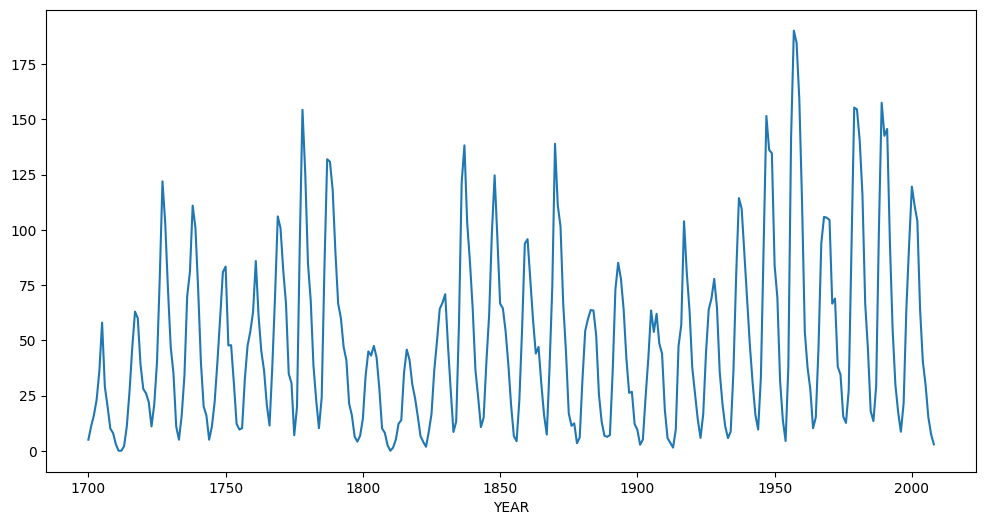

In [68]:
serie3.plot();

In [69]:
decomposicao3 = seasonal_decompose(serie3, period=2)

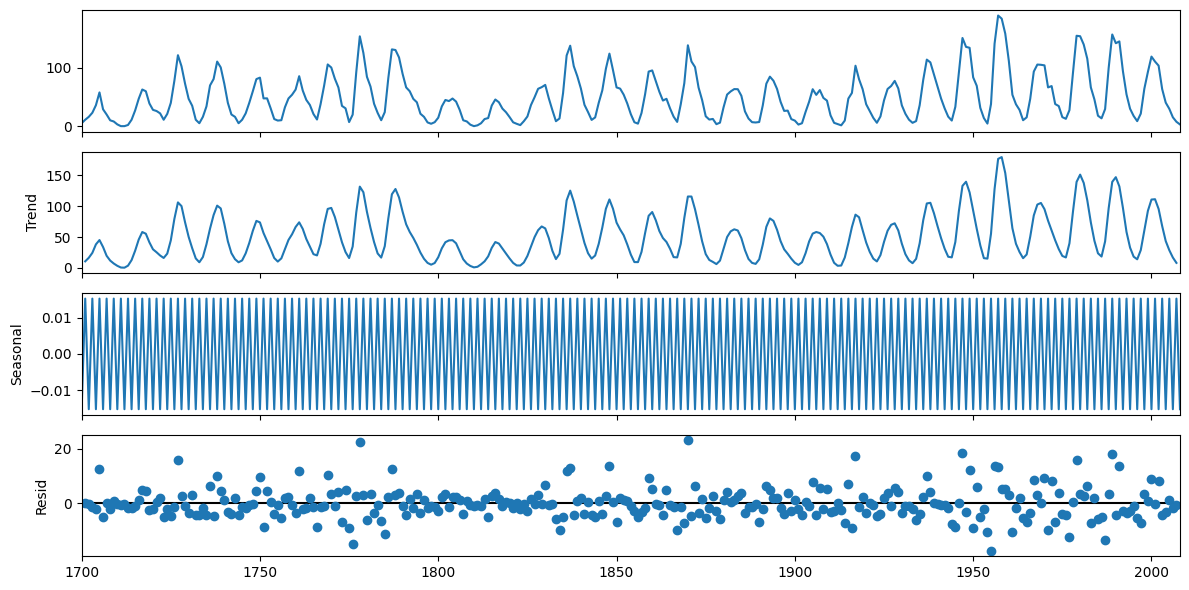

In [70]:
decomposicao3.plot()
plt.show()

In [71]:
serie4 = pd.Series(manchas_solares['SUNACTIVITY'].values, index = indice)
serie4

1700-12-31     5.0
1701-12-31    11.0
1702-12-31    16.0
1703-12-31    23.0
1704-12-31    36.0
              ... 
2004-12-31    40.4
2005-12-31    29.8
2006-12-31    15.2
2007-12-31     7.5
2008-12-31     2.9
Freq: A-DEC, Length: 309, dtype: float64

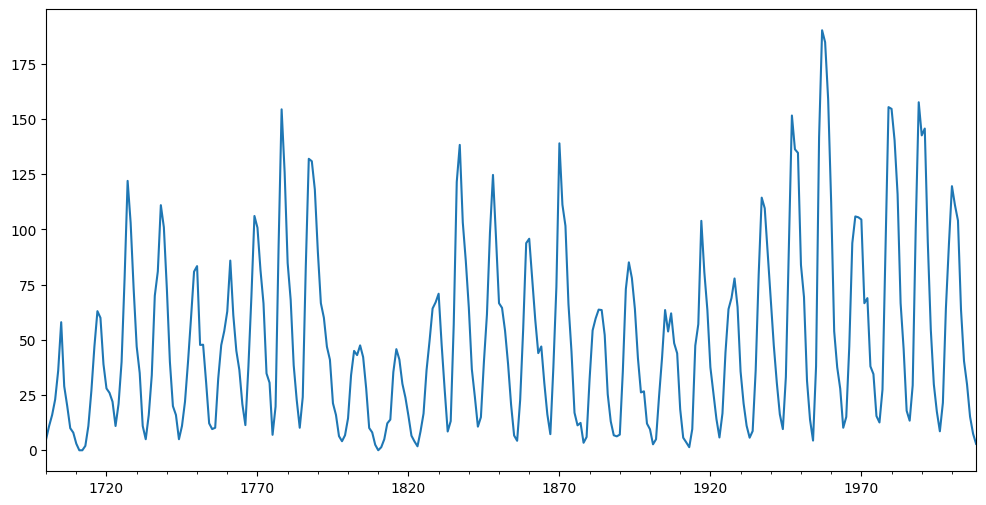

In [72]:
serie4.plot();

In [75]:
decomposicao4 = seasonal_decompose(serie4,period=1) # a frequência bate exatamente com a sazonalidade, é necessário mudar a frequência

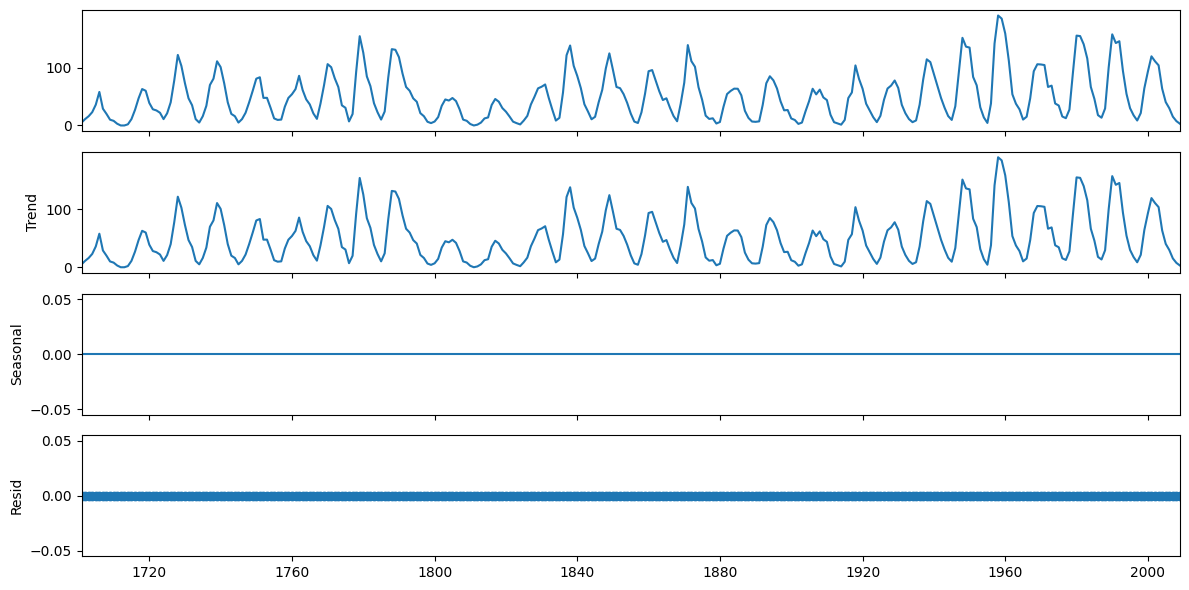

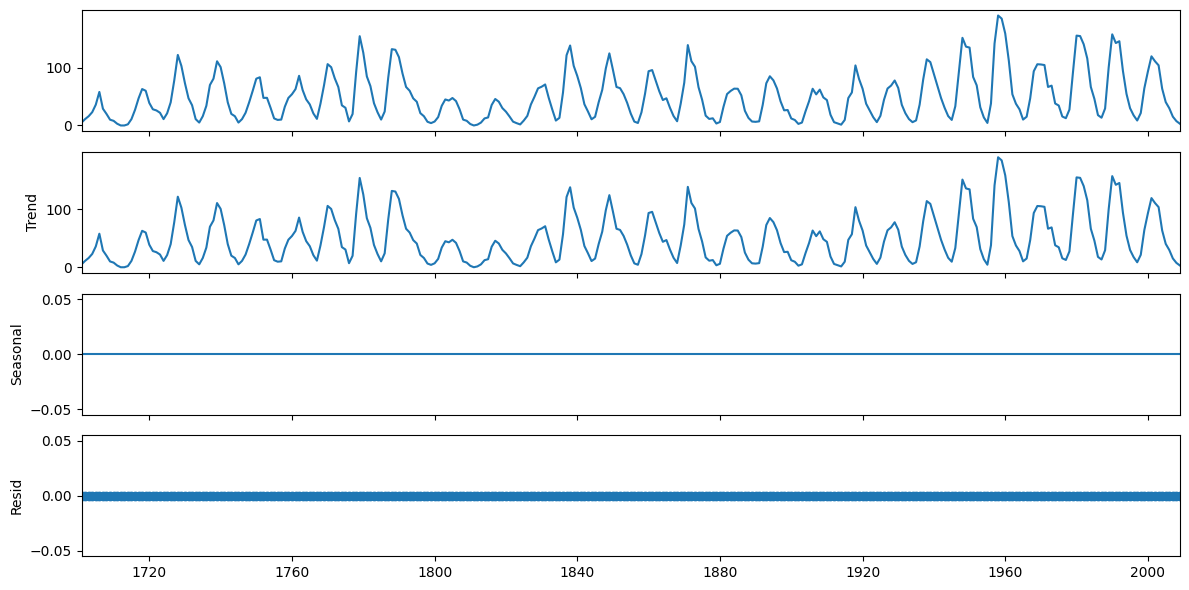

In [76]:
decomposicao4.plot()

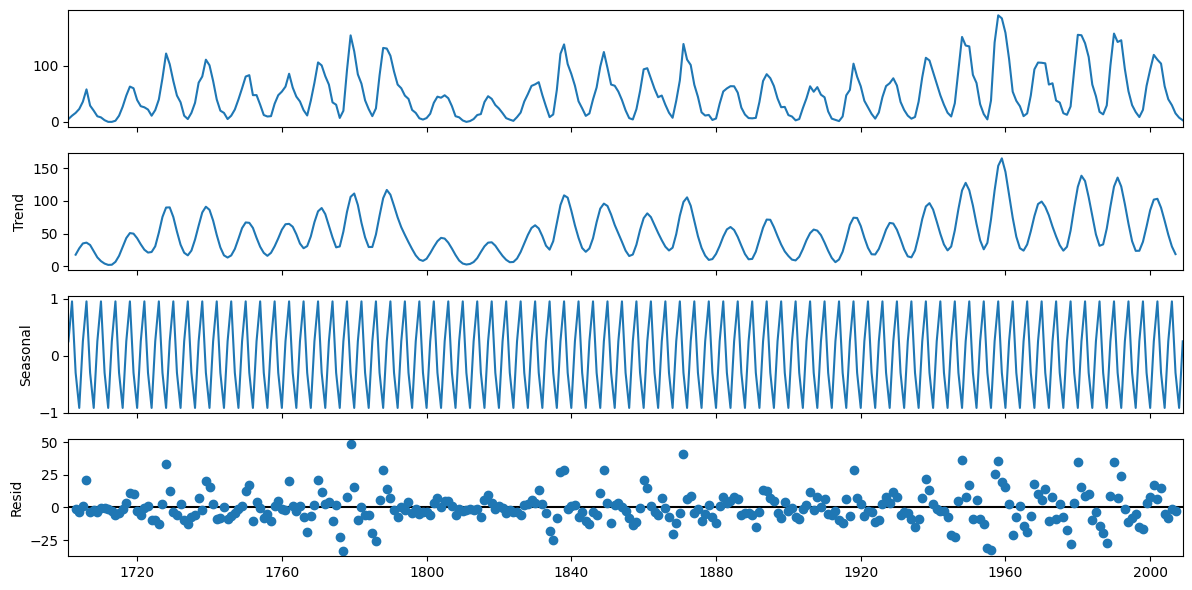

In [77]:
decomposicao4 = seasonal_decompose(serie4,period=4)
decomposicao4.plot();